## Практическая работа

## Цели практической работы

*  решить реальную задачу;
*  потренироваться в обработке данных;
*  обучить различные модели классификации, подобрать гиперпараметры и выбрать лучшую модель;
*  добиться наилучшего качества в задаче.

## Что входит в практическую работу

*  исследование датасета и обработка данных (работа с пропущенными и ошибочными значениями);
*  обучение различных моделей классификации с параметрами по умолчанию;
*  подбор гиперпараметров моделей;
*  смешивание моделей;
*  оценка качества моделей.

## Что оценивается

*  Выполнены все этапы задания: код запускается, отрабатывает без ошибок; подробно и обоснованно написаны текстовые выводы, где это требуется.

## Формат сдачи
Выполните предложенные задания: впишите свой код (или, если требуется, текст) в ячейки после комментариев. 

*Комментарии — это текст, который начинается с символа #. Например: # ваш код здесь.*

Сохраните изменения, используя опцию Save and Checkpoint из вкладки меню File или кнопку Save and Checkpoint на панели инструментов. Итоговый файл в формате .ipynb (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку.

### 1. Загрузите тренировочные и тестовые датасеты

In [192]:
import numpy as np
import pandas as pd
#from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')


In [216]:

df = pd.read_csv("TrainData.csv")
test_data = pd.read_csv("TestData.csv")

In [87]:
print(df.target.value_counts()[1] / df.target.value_counts()[0])
print(test_data.target.value_counts()[1] / test_data.target.value_counts()[0])

0.31394533987386125
0.30684788290642967


### 2. Изучите тренировочные и тестовые данные на наличие:
- пропусков,
- ошибочных значений.

Обработайте пропуски и ошибочные значения способом, выбранным по своему усмотрению.

In [88]:
# Ваш код здесь
for feature in df.columns:
    print(len(df[df[feature].isna() == True]),' - ', feature)

0  -  f1
75  -  f2
0  -  f3
0  -  f4
0  -  f5
0  -  f6
1875  -  f7
0  -  f8
0  -  f9
0  -  f10
10  -  f11
0  -  f12
0  -  f13
0  -  f14
0  -  target


In [89]:

def outliers(df3, feature_str):
    bounds = []
    q25 = df3[feature_str].quantile(0.25)
    q75 = df3[feature_str].quantile(0.75)
    iqr = q75 - q25
    bounds = (round(q25 - 1.5 * iqr, 2), round(q75 + 1.5 * iqr, 2))
#     print(feature_str)
#     print(q75)
#     print(q25)
#     print(iqr)
#     print(bounds)
#     print('_______')
    df3[feature_str] = df3[feature_str].apply(lambda x:bounds[0] if x < bounds[0] else ( bounds[1] if x > bounds[1] else x))



    return df3

In [90]:
def empties_remover(x_train, feature_str):
    
    
    mean = x_train[feature_str].mean()
    x_train.loc[x_train[feature_str].isna() == True, feature_str] = mean
    
    return x_train

In [91]:
def how_many_empties(df3, feature_str):
    
    print(len(df3[df3[feature_str].isna() == True]))
    
    pass

    

In [210]:
#скалируем
def scaler(df2):
    cols_to_scale = []


    cols_obj = []
    for col in df2.columns:
        if col == 'target':
            continue
        if '_' in col:
            continue
        if df2[col].dtype != 'object':
            cols_to_scale.append(col)
    col_names = cols_to_scale.copy()

    for i in range(len(col_names)):
        col_names[i] = col_names[i] + '_scaled'

    scaler2 = StandardScaler()
    df_scaled = scaler2.fit_transform(df2[cols_to_scale])
    df2[col_names] = pd.DataFrame.from_records(df_scaled, columns=col_names)
    df2 = df2.drop(cols_to_scale, axis=1)
    return df2

In [230]:
cols_obj_probably = ['f2', 'f5', 'f6', 'f8', 'f9', 'f10']

In [241]:
df = pd.read_csv("TrainData.csv")

df = empties_remover(df, 'f2')
df = empties_remover(df, 'f7')
df = empties_remover(df, 'f11')

for feat in cols_obj:
    df[feat] = df[feat].apply(lambda xx: str(xx))
df_mid = pd.get_dummies(df[cols_obj], dtype=int) #2, 6, 8, 9, 10
df2 = pd.merge(df, df_mid, left_index=True, right_index=True)
df = df2.drop(cols_obj, axis=1)

df = scaler(df)


In [240]:
test_data = pd.read_csv("TestData.csv")

test_data = empties_remover(test_data, 'f2')
test_data = empties_remover(test_data, 'f7')
test_data = empties_remover(test_data, 'f11')


for feat in cols_obj:
    test_data[feat] = test_data[feat].apply(lambda xx: str(xx))
test_data_mid = pd.get_dummies(test_data[cols_obj], dtype=int) #2, 6, 8, 9, 10
test_data2 = pd.merge(test_data, test_data_mid, left_index=True, right_index=True)
test_data = test_data2.drop(cols_obj, axis=1)

test_data = scaler(test_data)

In [249]:
cols_max = list(df.columns)
for feature in test_data.columns:
    if feature in cols_max:
        continue
    else:
        cols_max.append(str(feature))


In [229]:
for feature in df.columns:
    print(  
        feature, 
        ' ',
        len(df[feature].value_counts()     ),
        '-------------',
        feature, 
        ' ',
        len(test_data[feature].value_counts()     ),
    )

f1   70 ------------- f1   67
f2   9 ------------- f2   1
f3   6602 ------------- f3   2400
f4   16 ------------- f4   1
f5   16 ------------- f5   16
f6   7 ------------- f6   1
f7   16 ------------- f7   1
f8   6 ------------- f8   1
f9   5 ------------- f9   1
f10   2 ------------- f10   1
f11   96 ------------- f11   67
f12   69 ------------- f12   39
f13   82 ------------- f13   65
f14   35 ------------- f14   1
target   2 ------------- target   2


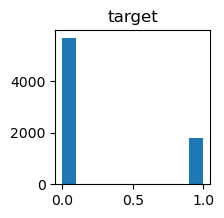

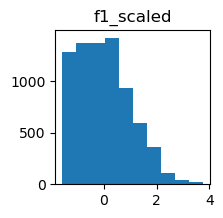

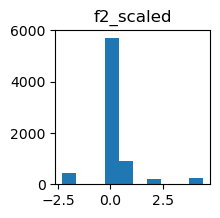

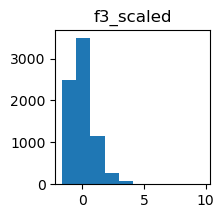

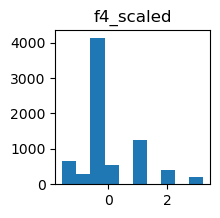

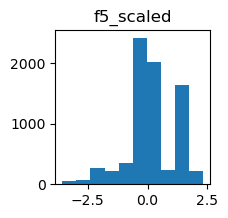

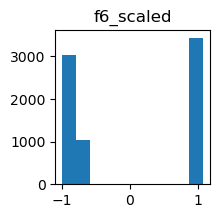

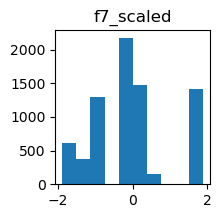

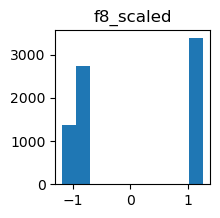

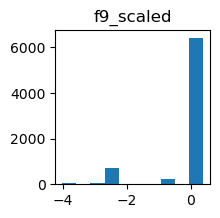

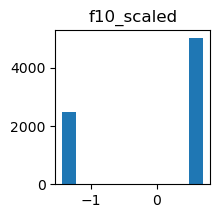

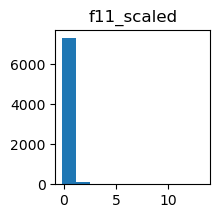

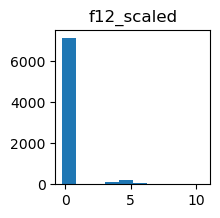

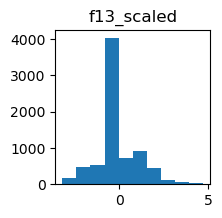

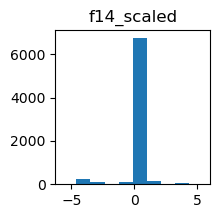

In [97]:
for feature    in df.columns:
    plt.figure(figsize=(2,2))
    # plt.plot(np.arange(0, len(x_train)), x_train.f1 )
    plt.hist(df[feature] )
#     plt.xticks(x_train[feature].value_counts().keys())
    plt.title(feature)
    #x_train#.f11.value_counts()

In [98]:
for feature    in df.columns:
    if df[feature].quantile(0.25) == df[feature].quantile(0.75):
        continue
    df = outliers(df, feature)

In [99]:
for feature in df.columns:
    print(  feature, ' ',len(df[feature].value_counts()     ))

target   2
f1_scaled   60
f2_scaled   5
f3_scaled   6388
f4_scaled   10
f5_scaled   13
f6_scaled   7
f7_scaled   16
f8_scaled   6
f9_scaled   5
f10_scaled   2
f11_scaled   96
f12_scaled   69
f13_scaled   22
f14_scaled   35


### 3. Оцените баланс классов в задаче
- Затем попытайтесь устно ответить на вопрос, можно ли использовать accuracy как метрику качества в задаче? 

In [100]:
# Ваш код здесь
# я бы сказал, что accuracy может быть актуальной метрикой по двум причинам:
# 1) перевес в сторону ноликов есть, но это не катастрофический - 0,7 к 0,3 - все еще это предположение - 
# размер набора данных позволяет немного поиграть с наполнением выборки, или с весами в самой модели
# 2) по сути нам не известно про датасет ничего - т.е. как я это вижу - у нас нет 
# оснований отдавать предпочтение одной из альтернативных метрик

### 3. Постройте baseline-модель:
- разбейте TrainData на тренировочные (Train) и тестовые данные (Test); 
- обучите KNN, LogisticRegression и SVC с параметрами по умолчанию на тренировочных данных (Train);
- примените модели на тестовых данных (Test) и вычислите значение метрики f1.

In [101]:


x = df.drop('target', axis=1)
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)

knn = KNeighborsClassifier()
svc = SVC()
logr = LogisticRegression()

models = [
    knn,
    svc,
    logr,
]

scores = dict()

for model in models:
    model.fit(x_train, y_train)
    preds =  model.predict(x_test)
    scores[f'{model}-f1-score'] =          f1_score( y_test, preds )
    scores[f'{model}-acc-score'] =    accuracy_score( y_test, preds )

for key in scores.keys():
    print (  key, ' - ',   scores[key])

# Ваш код здесь

KNeighborsClassifier()-f1-score  -  0.6068702290076337
KNeighborsClassifier()-acc-score  -  0.8168888888888889
SVC()-f1-score  -  0.6306878306878306
SVC()-acc-score  -  0.8448888888888889
LogisticRegression()-f1-score  -  0.6362715298885512
LogisticRegression()-acc-score  -  0.8404444444444444


## небольшое отступление
кажется, дальше мы не будем пробовать манипулировать составом выборки - по этому, "пока не далеко ушли" - попробуем это сделать

In [102]:
def sample_df3(df3, total_rows =  200000, neg_percent = 50, pos_percent = 50):
    print( 'sample_df3 start')
    df3_pos = df3[df3['target'] == 1].sample(int(total_rows / 100 * pos_percent))
    df3_neg = df3[df3['target'] == 0].sample(int(total_rows / 100 * neg_percent))
    df3_pos = df3_pos.reset_index()
    df3_neg = df3_neg.reset_index()
    df3_pos = df3_pos.drop('index', axis=1)
    df3_neg = df3_neg.drop('index', axis=1)
    df3 = pd.concat([df3_pos, df3_neg])
    
    print( 'sample_df3 end')
    print('-')      
    #print('-')      
    #print('-') 
    
    return df3

In [103]:
df.target.value_counts()[1]

1792

In [104]:
df.target.value_counts()[1]

1792

In [105]:
df_tst = sample_df3(df, df.target.value_counts()[1] / 7 * 10, 30, 70)

sample_df3 start
sample_df3 end
-


In [106]:


x = df_tst.drop('target', axis=1)
y = df_tst['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)

knn = KNeighborsClassifier()
svc = SVC()
logr = LogisticRegression()

models = [
    knn,
    svc,
    logr,
]

scores = dict()

for model in models:
    model.fit(x_train, y_train)
    preds =  model.predict(x_test)
    scores[f'{model}-f1-score'] =          f1_score( y_test, preds )
    scores[f'{model}-acc-score'] =    accuracy_score( y_test, preds )

for key in scores.keys():
    print (  key, ' - ',   scores[key])

# Ваш код здесь

KNeighborsClassifier()-f1-score  -  0.9
KNeighborsClassifier()-acc-score  -  0.8515625
SVC()-f1-score  -  0.9070567986230638
SVC()-acc-score  -  0.859375
LogisticRegression()-f1-score  -  0.9076655052264807
LogisticRegression()-acc-score  -  0.8619791666666666


In [107]:
# по мере увеличения процента "единичек" в обучающей выборке accuracy понемногу падает сначала до уровня рандомного классификатора, 
# но потом чуть повышается, хотя ф1 показывает стабильный рост.
# но хватит баловаться, едем дальше:)

### 4. Улучшите модели
Попробуйте улучшить качество обученных моделей:
- можете подбирать гиперпараметры моделей (лучше это делать по кросс-валидации на Train, то есть с помощью использования GridSearchCV на Train);
- можете задавать class_weights;
- можете вручную или при помощи методов Python генерировать новые признаки и/или удалять существующие.

Это самая важная и творческая часть задания. Проводите как можно больше экспериментов!

Проведите минимиум три эксперимента: для каждого типа модели минимум один эксперимент.

In [274]:
df = pd.read_csv("TrainData.csv")
#necessary

df = empties_remover(df, 'f2')
df = empties_remover(df, 'f7')
df = empties_remover(df, 'f11')


# encoding

# cols_obj = ['f2', 'f6', 'f8', 'f9', 'f10']
# for feat in cols_obj:
#     df[feat] = df[feat].apply(lambda xx: str(xx))
# df_mid = pd.get_dummies(df[cols_obj], dtype=int) #2, 6, 8, 9, 10
# df2 = pd.merge(df, df_mid, left_index=True, right_index=True)
# df = df2.drop(cols_obj, axis=1)

# for feature in cols_max:
#     if feature in x_train.columns:
#         continue
#     else:
#         x_train[feature] = 0
# x_train = x_train.reindex(columns=cols_max)
        
# for feature in cols_max:
#     if feature in x_test.columns:
#         continue
#     else:
#         x_test[feature] = 0
# x_test = x_test.reindex(columns=cols_max)  


# scaling
df = scaler(df)


scores = []


x = df.drop('target', axis=1)
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)


knn = KNeighborsClassifier()
svc = SVC()
logr = LogisticRegression()

models = [
    knn,
    svc,
    logr,
]


param_grid = {
    'KNeighborsClassifier()': {
        'n_neighbors': [3, 5, 7], 
        'weights': ['uniform', 'distance'], 
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    },
    'SVC()': {
        'C': [0.1, 1, 10],
        'kernel': ['rbf'],#['linear', 'rbf', 'sigmoid'],
        'gamma': [0.1, 0.01, 0.001],
        'class_weight':['balanced', None],
    },
    'LogisticRegression()': {
        'penalty': ['l1', 'l2'], 
        'C': np.arange(0.001, 3, 0.1), 
        'solver': ['liblinear', 'saga'],
        'class_weight':['balanced', None],
    },
}

      

for model in models:
    
    grid_search = GridSearchCV(   model   , param_grid[str(    model    )], cv=3, scoring='f1')

    grid_search.fit(x_train, y_train)
    
    scores.append(grid_search.best_score_)
    print(type(model))
    print("Best Parameters:", grid_search.best_params_)
    print("Best Score:", scores[-1])
    
#     model.fit(x_train, y_train)
#     scores_def = dict()
#     preds =  model.predict(x_train)
#     scores_def[f'{model}-f1-score'] =  f1_score( y_train, preds )
#     print('baseline model f1 score is ', scores_def[f'{model}-f1-score'])
    print("__________")

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'uniform'}
Best Score: 0.6106889309580441
__________
<class 'sklearn.svm._classes.SVC'>
Best Parameters: {'C': 1, 'class_weight': 'balanced', 'gamma': 0.1, 'kernel': 'rbf'}
Best Score: 0.6627631626660354
__________
<class 'sklearn.linear_model._logistic.LogisticRegression'>
Best Parameters: {'C': 0.401, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'saga'}
Best Score: 0.667272888440149
__________


### 5. Оцените на отложенной выборке качество наилучшей модели
В пунктах 3 и 4 вы построили много разных моделей.

Возьмите ту, которая дала наилучшее качество на тестовых данных (Test). Примените её на отложенной выборке (TestData) и выведите на экран значение метрики f1.

In [287]:
# necessary
test_data = pd.read_csv("TestData.csv")


test_data = empties_remover(test_data, 'f2')
test_data = empties_remover(test_data, 'f7')
test_data = empties_remover(test_data, 'f11')

# encoding
# cols_obj = ['f2', 'f6', 'f8', 'f9', 'f10']
# for feat in cols_obj:
#     test_data[feat] = test_data[feat].apply(lambda xx: str(xx))
# test_data_mid = pd.get_dummies(test_data[cols_obj], dtype=int) #2, 6, 8, 9, 10
# test_data2 = pd.merge(test_data, test_data_mid, left_index=True, right_index=True)
# test_data = test_data2.drop(cols_obj, axis=1)

# for feature in cols_max:
#     if feature in x.columns:
#         continue
#     else:
#         x[feature] = 0
# x = x.reindex(columns=cols_max)

#optional
test_data = scaler(test_data)



for feature    in test_data.columns:
    if test_data[feature].quantile(0.25) == test_data[feature].quantile(0.75):
        continue
    test_data = outliers(test_data, feature)
    
x = test_data.drop('target', axis=1)
y = test_data['target']
        


In [289]:
best_model = LogisticRegression(penalty='l1',C=0.401, solver='saga', class_weight='balanced')

best_model.fit(x_train, y_train)
scores_best = dict()
preds_test = best_model.predict(x_test)
preds =  best_model.predict(x)
scores_best[f'{best_model}-f1-score'] =  f1_score( y, preds )
print('test_data score', scores_best[f'{best_model}-f1-score'])
print('train_test score', f1_score( y_test, preds_test ))
# accuracy_score(y, preds)

{"LogisticRegression(C=0.401, class_weight='balanced', penalty='l1',\n                   solver='saga')-f1-score": 0.509594882729211}
0.6746143057503506


### 6. Выполните хитрый трюк
Часто смешивание различных моделей даёт улучшение итогового предсказания. Попробуйте смешать две лучшие модели по формуле:
$$pred_{final} = \alpha\cdot pred_1 + (1-\alpha)\cdot pred_2$$.

Значение $\alpha$ подберите в цикле по Test-выборке. Оцените качество на отложенной выборке.

Удалось ли добиться улучшения качества?

In [269]:
#seciond_best model
second_best_model = SVC(C=1, gamma=0.1, kernel='rbf', class_weight='balanced') 
# second_best_model = KNeighborsClassifier(n_neighbors=3 ,algorithm= 'auto',  weights='distance')
second_best_model.fit(x_train, y_train)
preds2 =  second_best_model.predict(x)
scores_best[f'{second_best_model}-f1-score'] =  f1_score( y, preds2 )
scores_best

{"LogisticRegression(C=2.601, class_weight='balanced', penalty='l1',\n                   solver='saga')-f1-score": 0.6733712286838652,
 "SVC(C=1, class_weight='balanced', gamma=0.1)-f1-score": 0.6973031283710895}

In [270]:
# Ваш код здесь
super_best_score = -1
# thr = 0.5
best_thr = -1
best_alpha = -1
for thr in np.arange(0.01, 1, 0.01):
    for alpha in np.arange(0.01, 1, 0.01):
    #     preds_final = alpha * preds + (1 - alpha) * preds2
        preds_final = (alpha * preds + (1 - alpha) * preds2 > thr).astype(int)
        final_score = f1_score( y, preds_final )
        if scores_best[f'{best_model}-f1-score'] < final_score:
            super_best_score = final_score
#             print(alpha, ' thr is ',thr,   ' and score is ', super_best_score)
            best_thr = thr
            best_alpha = alpha
print('alpha is ',best_alpha, ' thr is ',best_thr,   ' and score is ', super_best_score)
# print('baseline score was ' )


alpha is  0.99  thr is  0.99  and score is  0.6994711427914464


In [264]:
scores_ultimate_list = [
    ['V', 'V', 'V', _____, 0.3864, 'V', 0.3916, 'logr'],
    ['V', 'V', 'X', _____, 0.6733, 'V', 0.6994, 'logr'],
    ['X', 'V', 'V', _____, _____, '____', _____, 'logr'],
    ['X', 'V', 'X', _____, 0.2078, 'V', 0.44250,'logr'],
    ['X', 'X', 'V', _____, _____, '____', _____, 'logr'],
    ['X', 'X', 'X', _____, 0.32957, 'V', 0.3668,'logr'],
    ['V', 'X', 'V', _____, _____, '____', _____, 'logr'],
    ['V', 'X', 'X', _____, 0.5059, 'X', 0,'logr'],
]
cols = [
    'балансировка',
    'скалирование',
    'кодирование',
    'скор на train_test',
    'скор на test_data',
    'улучшение после смешения',
    'улучшилось до',
    'best model',
]

In [191]:
scores_ultimate_df= pd.DataFrame(scores_ultimate_list, columns=cols)
scores_ultimate_df


,балансировка,скалирование,лучший скор на test_data,улучшение после смешения,улучшилось до,best model
0,V,V,0.50950,V,0.5101,logr
1,X,V,0.20780,V,0.4425,logr
2,X,X,0.32957,V,0.3668,logr
3,V,X,0.50590,X,0.0000,logr


### 7. Сделайте выводы

Запишите в отдельной ячейке текстом выводы о проделанной работе. Для этого ответьте на вопросы:
- Какие подходы вы использовали для улучшения работы baseline-моделей?
- Какого максимального качества удалось добиться на Test-данных?
- Какое при этом получилось качество на отложенной выборке? 
- Ваша модель переобучилась, недообучилась или обучилась как надо?

1) в ход пошел подбор параметров по сетке, подбор порога, взвешенное смешение предиктов моделей, дополнительно попробовали манипулировать составом обучающих данных - на этот счет я не чувствую уверенности особой, но результаты как будто получились интереснее, чем манипулирование весами в рамках самой модели

2) 0.6685 - цифра, возможно, не самая впечатляющая, по крайней мере если сравнивать с результатами некоторых участников чата ml_j-курса, нои до нее я дошел не сразу - в этот раз я опробовал подход "заставь сначала работать, потом можно подрегулировать или прикрутить что то полезное" - таким образом были прикручены скалирование и кодирование фичей, которые похожи на категориальные - с кодированием было достаточно весело, учитывая что это два разных датасета и там только цифры - пришлось поколхозить:) 
Минус такого подхода в том, что сложно остановиться - хотя, возможно тут еще очевидный недостаток опыта - в какой момент стоит "сохранить и сдать", а когда стоит еще поковыряться - опять же нужно идти же дальше по курсу - на каждой "домашке" сидеть по столько же, сколько заняла итоговая во "введении" тоже ведь неправильно, мне кажется

3) 0.6733 - интересный фокус со смешением предсказаний - к своему стыду я не сразу въехал, что вместе с альфой нужно еще и порог подбирать( (или не нужно и я все же не догадался, чего от меня хотят??) однако, я не уверен, что до конца понимаю, насколько это "честно" - дело в том, что мы же по сути перебираем предсказания двух "хороших" моделей и выбираем те, которые нам больше "нравятся" на основании той или иной метрики.
Да, альфой мы регулируем уровень предпочтения отдаваемого предсказаниям одной или другой модели и, по сути, разве мы не подгоняем уже готовый результат под требования заказчика? Что в целом было бы не так страшно, но меня смущает то, что мы можем это делать только имея "ответы" к датасету - а ведь это все уже происходит на отложенной выборке, т.е., насколько я понимаю, там ответы "разрешено", "по-честному" использовать только для проверки результата, а не для того, чтобы отталкиваясь от них еще допиливать результат? 
Ведь по сути это еще один этап обучения. И не подумайте, меня смущает не чистота эксперимента - главное результат - но вопрос - ведь на реальном кейсе этот этап уже по сути будет недоступен? да, мы сможем использовать подобранные заранее альфу и порог - но мне кажется что мало того приемственность свойств данных (если можно так выразиться) от обучающих к реальным и так представляет из себя большой вопрос - все течет все меняется же, так теперь мы как будто еще и пропускаем результат через призму не одной, а двух моделей, точность которых и так как бы не 100% по определению - не делаем ли мы хуже? учитывая то, что проверить уже будет нельзя

4) на трейне в основном результаты сильно лучше, полагаю, это свидетельствет о переобучении, хотя есть в датафрейме с результатами и вариант, где на отложенной выборке результаты практически совпадают, я бы сказал, что это максимально удачная модель, думаю, она не просто настроилась на тренировочный сет


Важный комментарий! В реальных задачах не следует ожидать, что машинным обучением всегда удастся решить задачу с хорошим качеством. Но использовать все имеющиеся у вас в арсенале методы для достижения наилучшего результата нужно.